## 공분산과 상관계수
- 다변수 확률변수 간의 상관 관계를 숫자로 나타낸 것

### 표본공분산(sample covariance)
- 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸 것
- $\bar{x}$와 $\bar{y}$는 $x$ 자료와 $y$자료의 표본평균

    $
    s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y})
    $


- 공분산의 경우에는 자료의 위치에 따라 이 값의 부호가 달라진다.
- 공분산의 부호는 $X$, $Y$ 데이터가 같은 부호를 가지는지 다른 부호를 가지는지에 대한 지표
- 평균을 중심으로 각 자료들이 어떻게 분포되어 있는지 크기와 방향성을 같이 보여준다.

### 표본상관계수(sample correlation coefficient)
- 공분산을 각각의 표본표준편차값으로 나누어 정규화(normalize)하여 정의

    $
    r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}}
    $


- **피어슨(Pearson) 상관계수**라고 하기도 한다.
- 사이파이의 stats 서브패키지는 피어슨 상관계수를 계산하는 `pearsonr()` 함수를 제공

### 확률변수의 공분산과 상관계수
- 두 확률변수 $X$와 $Y$의 공분산은 기댓값 연산자를 사용하여 정의.

    $
    \text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
    $


- 두 확률변수 $X$와 $Y$의 상관 계수 정의.

    $
    \rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}}
    $
    
    
- 확률변수의 상관계수의 성질.

    $
    -1 \leq \rho \leq 1
    $


- $\rho$가 -1, 0, 1인 경우.

    * $\rho = 1$ : 완전선형 상관관계
    * $\rho = 0$ : 무상관 (독립과는 다름)
    * $\rho = −1$ : 완전선형 반상관관계
    

- 상관계수는 스캐터 플롯의 기울기와는 아무런 상관이 없다.

### 비선형 상관관계
- 선형이 아닌 상관관계
- 피어슨 상관계수는 두 확률변수의 관계가 선형적일 때만 상관관계를 제대로 계산할 수 있다.

이 두가지 데이터는 모두 $x$의 값으로부터 $y$값을 알 수 있기 때문에 상관관계를 가지고 있다. 하지만 피어슨 상관계수는 모두 0으로 계산된다

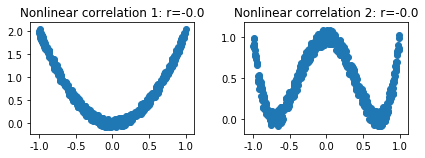

In [21]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

n = 500
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"Nonlinear correlation 1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"Nonlinear correlation 2: r={:3.1f}".format(r2))
plt.tight_layout()
plt.show()

### 다변수 확률변수의 표본공분산
- 스칼라가 아닌 벡터 표본값을 가지는 다변수 확률변수의 공분산에 대해

- 특징행렬

    $
    X = 
    \begin{bmatrix}
    x_{1, 1} & x_{1, 2} & \cdots   & x_{1, M} \\
    x_{2, 1} & x_{2, 2} & \cdots   & x_{2, M} \\
    \vdots   & \vdots  & \ddots   & \vdots   \\
    x_{N, 1} & x_{N, 2} & \cdots   & x_{N, M} \\
    \end{bmatrix}
    $


- 표본공분산행렬(Sample Covariance Matrix) 정의
    - $M$개의 서로 다른 확률변수의 모든 조합에 대한 공분산을 한꺼번에 표기하기 위해
    - 대각성분 : 각각의 확률변수의 분산
    - 비대각성분 : 서로 다른 두 확률변수의 공분산
    
    $
    S =
    \begin{bmatrix}
    s_{x_1}^2  & s_{x_1x_2} & \cdots & s_{x_1x_M} \\
    s_{x_1x_2} & s_{x_2}^2  & \cdots & s_{x_2x_M} \\
    \vdots     & \;\; \vdots& \ddots & \vdots \\
    s_{x_1x_M} & s_{x_2x_M} & \cdots & s_{x_M}^2 \\
    \end{bmatrix}
    $


- 위 행렬의 값 구하는 방법.


1. 각 확률변수 $x_j\,(j=1, \cdots, M)$의 표본평균을 계산.

    $
    \bar{x}_j = \dfrac{1}{N} \sum_{i=1}^N x_{i,j}
    $


2. 각 확률변수 $x_j\,(j=1, \cdots, M)$의 분산을 계산.

    $
    s_j^2 = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)^2
    $


3. 두 확률변수 $x_j, x_k$의 공분산을 계산.

    $
    s_{j,k} = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)(x_{i,k} - \bar{x}_k)
    $


### 다변수 확률변수의 공분산
- $M$개의 다변수 확률변수 벡터의 이론적 공분산행렬은 $\Sigma$로 표기하며 다음처럼 정의. 

    $ 
    X = 
    \begin{bmatrix}
    X_1 \\
    X_2 \\
    \vdots \\
    X_M 
    \end{bmatrix}
    $

$ 
\begin{aligned}
\Sigma = \text{Cov}[X] 
&=
\begin{bmatrix}
\sigma_{x_1}^2  &  \sigma_{x_1x_2} &  \sigma_{x_1x_3} &  \cdots &  \sigma_{x_1x_M} \\
\sigma_{x_1x_2} &  \sigma_{x_2}^2  &  \sigma_{x_2x_3} &  \cdots &  \sigma_{x_2x_M} \\
\vdots          &  \vdots          &  \vdots          &  \ddots &  \vdots          \\
\sigma_{x_1x_M} &  \sigma_{x_2x_M} &  \sigma_{x_3x_M} &  \cdots &  \sigma_{x_M}^2 \\
\end{bmatrix} \\
&=
\text{E} 
\begin{bmatrix}
(X_1 - \text{E}[X_1])^2                    & \cdots & (X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) \\
(X_1 - \text{E}[X_1])(X_2 - \text{E}[X_2]) & \cdots & (X_2 - \text{E}[X_2])(X_M - \text{E}[X_M]) \\
\vdots & \ddots &  \vdots  \\
(X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) & \cdots & (X_M - \text{E}[X_M])^2 
\end{bmatrix}
\end{aligned}
$